In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from typing_extensions import Doc

In [2]:
import gradio as gr

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('dataframe.csv')

In [4]:
df.head()

Term Code              Term Description                   College Name  \
0     120248  Fall 2024 - Urbana-Champaign  Agr, Consumer, & Env Sciences   
1     120248  Fall 2024 - Urbana-Champaign  Agr, Consumer, & Env Sciences   
2     120248  Fall 2024 - Urbana-Champaign  Agr, Consumer, & Env Sciences   
3     120248  Fall 2024 - Urbana-Champaign  Agr, Consumer, & Env Sciences   
4     120248  Fall 2024 - Urbana-Champaign  Agr, Consumer, & Env Sciences   

               Department Name   Course Subject Description  \
0  Ag Ldrshp Educ Comm Program  Agricultural Communications   
1  Ag Ldrshp Educ Comm Program  Agricultural Communications   
2  Ag Ldrshp Educ Comm Program  Agricultural Communications   
3  Ag Ldrshp Educ Comm Program  Agricultural Communications   
4  Ag Ldrshp Educ Comm Program  Agricultural Communications   

  Course Subject Code  Course Number                Course Title  \
0                AGCM            199  Undergraduate Open Seminar   
1                AGCM            220   Communicating Agriculture   
2                AGCM            230        Ag & Env Photography   
3                AGCM            250           Visual Principles   
4                AGCM            270  Ag Sales & Persuasive Comm   

   Course Contact Hours                            Course Description Text  \
0                   1.0  An experimental course on a special topic in a...   
1                   3.0  Skills necessary to communicate complex inform...   
2                   3.0  Application of photojournalism principles and ...   
3                   2.0  This course outlines fundamental design princi...   
4                   3.0  Sales concepts and persuasive business communi...   

                 Course Level whether_STEM Course Code  
0  First-year Student Seminar     Non-STEM     AGCM199  
1                   200-level     Non-STEM     AGCM220  
2                   200-level     Non-STEM     AGCM230  
3                   200-level     Non-STEM     AGCM250  
4                   200-level     Non-STEM     AGCM270

In [5]:
df['Course Number'] = df['Course Number'].astype(str)
df.dtypes

Term Code                       int64
Term Description               object
College Name                   object
Department Name                object
Course Subject Description     object
Course Subject Code            object
Course Number                  object
Course Title                   object
Course Contact Hours          float64
Course Description Text        object
Course Level                   object
whether_STEM                   object
Course Code                    object
dtype: object

In [6]:
df.shape

(9238, 13)

In [255]:
tfidf_matrix = pd.read_csv('tfidf_matrix.csv', header=None).values
tfidf_matrix.shape

(9238, 5220)

In [8]:
word2vec_matrix = pd.read_csv('word2vecmatrix.csv',header=None).values
word2vec_matrix.shape

(9238, 100)

In [295]:
word2vec_matrix

array([[-0.59185249, -0.03651783, -0.22536232, ...,  0.80468696,
         1.01116395, -0.72963887],
       [ 0.43505937,  0.02085773,  0.93196958, ...,  0.03256788,
        -0.56615168, -0.08191548],
       [ 0.26243287, -0.16888413,  0.6254164 , ...,  0.11200953,
        -0.56293452, -0.01230075],
       ...,
       [ 0.40099204,  0.38101873, -0.27044016, ...,  0.91522276,
        -0.32788542,  0.86082637],
       [ 0.36473438,  0.51549619, -0.30660361, ...,  0.86357439,
        -0.27341262,  0.84617066],
       [ 0.44897079,  0.09295524, -0.24953909, ...,  0.59864444,
         0.29002264,  0.56110066]])

In [9]:
sbert1_matrix = pd.read_csv('sentencetransformer1.csv',header=None).values
sbert1_matrix .shape

(9238, 768)

In [253]:
sbert2_matrix = pd.read_csv('sentencetransformer2 copy.csv',header=None).values
sbert2_matrix.shape

(9238, 768)

In [254]:
sbert2_matrix == sbert1_matrix

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [256]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize PCA with 2 components
tsne = TSNE(n_components=2, perplexity=50, random_state=42) 

# Pass our TF-IDF matrix to the PCA and store the reduced vectors into pca_vecs
tsne_vecs = tsne.fit_transform(tfidf_matrix)

# Save our two dimensions into x0 and x1
x0 = tsne_vecs[:, 0]
x1 = tsne_vecs[:, 1]

# Add these components to your DataFrame
df['x0_tf'] = x0
df['x1_tf'] = x1


In [12]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42) 

# Pass our TF-IDF matrix to the PCA and store the reduced vectors into pca_vecs
tsne_vecs = tsne.fit_transform(word2vec_matrix)

# Save our two dimensions into x0 and x1
x0 = tsne_vecs[:, 0]
x1 = tsne_vecs[:, 1]

# Add these components to your DataFrame
df['x0_w2v'] = x0
df['x1_w2v'] = x1

In [13]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42) 

# Pass our TF-IDF matrix to the PCA and store the reduced vectors into pca_vecs
tsne_vecs = tsne.fit_transform(sbert1_matrix)

# Save our two dimensions into x0 and x1
x0 = tsne_vecs[:, 0]
x1 = tsne_vecs[:, 1]

# Add these components to your DataFrame
df['x0_sb1'] = x0
df['x1_sb1'] = x1

In [14]:
tsne = TSNE(n_components=2, perplexity=50, random_state=42) 

# Pass our TF-IDF matrix to the PCA and store the reduced vectors into pca_vecs
tsne_vecs = tsne.fit_transform(sbert2_matrix)

# Save our two dimensions into x0 and x1
x0 = tsne_vecs[:, 0]
x1 = tsne_vecs[:, 1]

# Add these components to your DataFrame
df['x0_sb2'] = x0
df['x1_sb2'] = x1

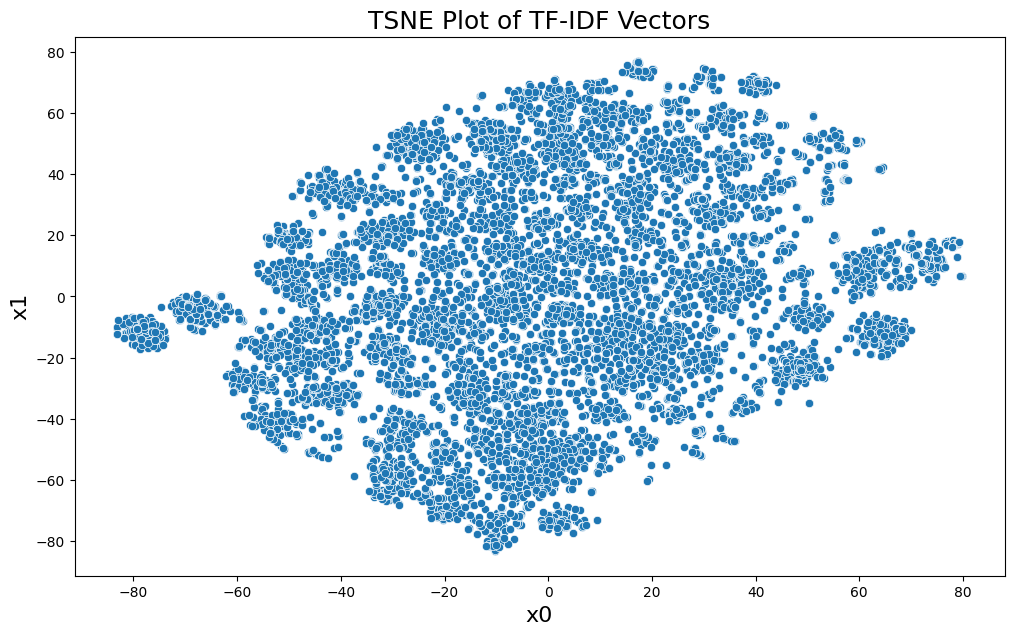

In [257]:
%matplotlib inline
# Set image size
plt.figure(figsize=(12, 7))

# Set a title
plt.title("TSNE Plot of TF-IDF Vectors", fontdict={"fontsize": 18})

# Set axes names
plt.xlabel("x0", fontdict={"fontsize": 16})
plt.ylabel("x1", fontdict={"fontsize": 16})

# Create a scatter plot with seaborn, assuming you have a 'hue' column for grouping if needed
sns.scatterplot(data=df, x='x0_tf', y='x1_tf')

plt.show()

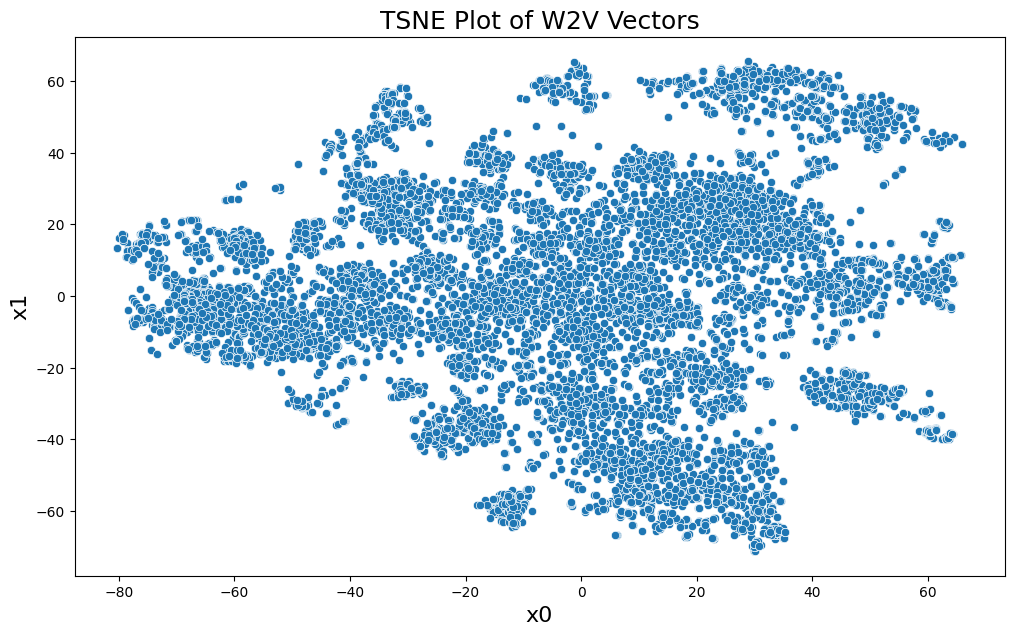

In [16]:
plt.figure(figsize=(12, 7))

# Set a title
plt.title("TSNE Plot of W2V Vectors", fontdict={"fontsize": 18})

# Set axes names
plt.xlabel("x0", fontdict={"fontsize": 16})
plt.ylabel("x1", fontdict={"fontsize": 16})

# Create a scatter plot with seaborn, assuming you have a 'hue' column for grouping if needed
sns.scatterplot(data=df, x='x0_w2v', y='x1_w2v')

plt.show()

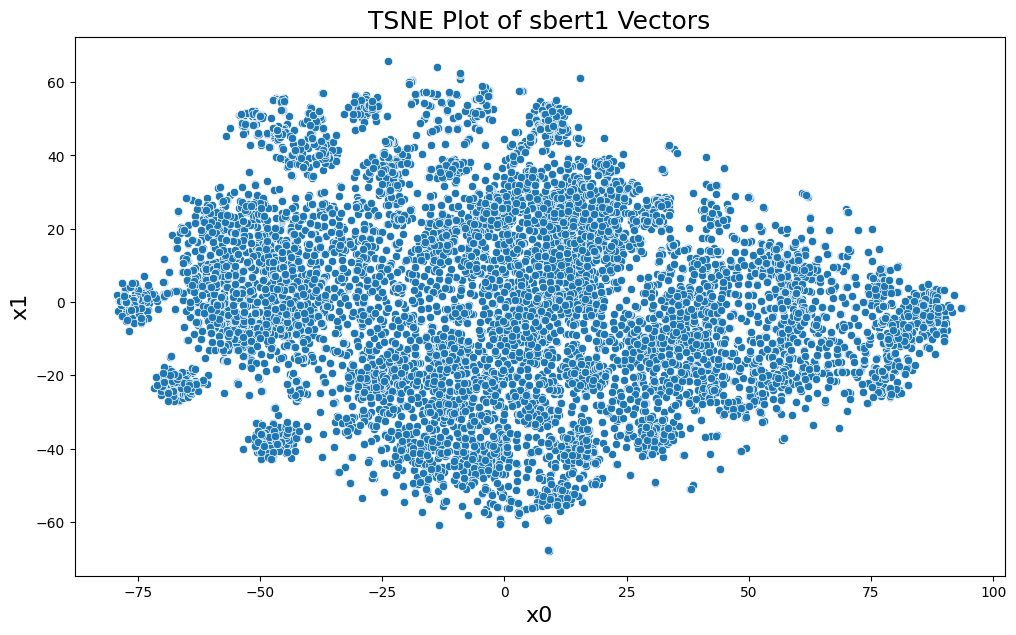

In [17]:
plt.figure(figsize=(12, 7))

# Set a title
plt.title("TSNE Plot of sbert1 Vectors", fontdict={"fontsize": 18})

# Set axes names
plt.xlabel("x0", fontdict={"fontsize": 16})
plt.ylabel("x1", fontdict={"fontsize": 16})

# Create a scatter plot with seaborn, assuming you have a 'hue' column for grouping if needed
sns.scatterplot(data=df, x='x0_sb1', y='x1_sb1')

plt.show()

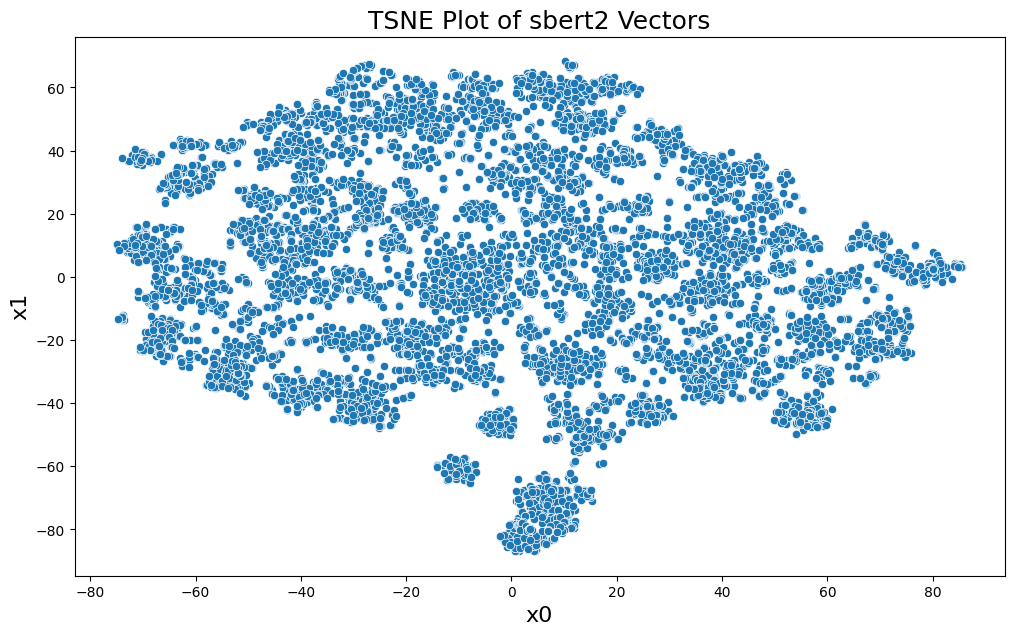

In [18]:
plt.figure(figsize=(12, 7))

# Set a title
plt.title("TSNE Plot of sbert2 Vectors", fontdict={"fontsize": 18})

# Set axes names
plt.xlabel("x0", fontdict={"fontsize": 16})
plt.ylabel("x1", fontdict={"fontsize": 16})

# Create a scatter plot with seaborn, assuming you have a 'hue' column for grouping if needed
sns.scatterplot(data=df, x='x0_sb2', y='x1_sb2')

plt.show()

In [281]:
def course_recommendation(model, course_subject_code, course_number, whether_not_lower_level=False, whether_only_sameorlower_level = False, whether_not_same_subject=False, whether_only_same_subject=False, recomendations_number = 5):
    if model == "tf-idf":
        docmatrix = tfidf_matrix
    elif model == "word2vec":
        docmatrix = word2vec_matrix
    elif model == "sbert1":
        docmatrix = sbert1_matrix  # This appears to have been a typo in the original code
    elif model == "sbert2":
        docmatrix = sbert2_matrix

    # Check if the course exists in the dataframe
    if not ((df['Course Subject Code'] == course_subject_code) & (df['Course Number'] == course_number)).any():
        return pd.DataFrame({'Message': ["The course you input does not exist in this semester or we do not have enough course description information about it. Please try another course. "]})

    if whether_not_lower_level == True and whether_only_sameorlower_level == True:
        return pd.DataFrame({'Message': ["There seems to be a conflict in the filtering logic. Please double-check the checkboxes for filtering carefully."]})
    if whether_not_same_subject == True and whether_only_same_subject == True:
        return pd.DataFrame({'Message': ["There seems to be a conflict in the filtering logic. Please double-check the checkboxes for filtering carefully."]})

    # Get the index and level of the course in the dataframe
    course_info = df[(df['Course Subject Code'] == course_subject_code) & (df['Course Number'] == course_number)]
    course_index = course_info.index[0]
    course_level = course_info.iloc[0]['Course Level']
    # Normalize "First-year Student Seminar" to "100-level"
    course_level = "100-level" if course_level == "First-year Student Seminar" else course_level

    df_filtered = df.copy()
    if whether_not_same_subject:
        df_filtered = df_filtered[df_filtered['Course Subject Code'] != course_subject_code]
    if whether_only_same_subject:
        df_filtered = df_filtered[df_filtered['Course Subject Code'] == course_subject_code]
    
    if whether_not_lower_level:
        levels_to_include = ['100-level', '200-level', '300-level', '400-level', 'Graduate level']
        current_level_index = levels_to_include.index(course_level)
        allowed_levels = levels_to_include[current_level_index:]  # Include current and higher levels
        df_filtered = df_filtered[df_filtered['Course Level'].isin(allowed_levels)]
    
    if whether_only_sameorlower_level:
        levels_to_include = ['100-level', '200-level', '300-level', '400-level', 'Graduate level']
        current_level_index = levels_to_include.index(course_level)
        allowed_levels = levels_to_include[:current_level_index + 1]  # Include current and lower levels
        df_filtered = df_filtered[df_filtered['Course Level'].isin(allowed_levels)]

    # Retrieve the vector for the specified course
    course_vector = docmatrix[course_index]

    # Calculate the cosine similarity with filtered courses
    cosine_similarities = cosine_similarity(docmatrix[df_filtered.index], course_vector.reshape(1, -1)).flatten()

    # Get the indices of the courses with the highest cosine similarity scores
    similar_courses_indices = np.argsort(-cosine_similarities)[:int(recomendations_number)+1]

    # Retrieve the course details for the most similar courses
    similar_courses = df_filtered.iloc[similar_courses_indices][['Course Code', 'Course Title', 'Course Description Text']]
    if similar_courses.index[0] == course_index:
        similar_courses = similar_courses.iloc[1:]  # Exclude the original course if it is the highest ranked
    else:
        similar_courses = similar_courses.head(int(recomendations_number))
    
    # Insert a column for similarity rank
    
    input_course_details = course_info[['Course Code', 'Course Title', 'Course Description Text']]
    result_df = pd.concat([input_course_details, similar_courses]).reset_index(drop=True)
    result_df .insert(0, 'Similar Rank', range(0, len(similar_courses) + 1))
    return result_df


In [166]:
course_recommendation("sbert2", "SOC", "200",
                      whether_not_lower_level=False, 
                      whether_only_sameorlower_level = False, 
                      whether_not_same_subject=False, 
                      whether_only_same_subject=False
                      ).equals(
                          course_recommendation("word2vec", "SOC", "200",
                                                whether_not_lower_level=False, 
                                                whether_only_sameorlower_level = False, 
                                                whether_not_same_subject=False, 
                                                whether_only_same_subject=False))



False

In [286]:
def highlight_first_column(s, color):
    return ['background-color: {}'.format(color) if s.name == df.columns[0] else '' for _ in s]

In [289]:
course_recommendation("word2vec", "SOC", "100",whether_not_lower_level=False, whether_only_sameorlower_level = False, whether_not_same_subject=True, whether_only_same_subject=False).style.apply(highlight_first_column, color='blue', axis=0)

In [266]:
course_recommendation("tf-idf", "SOC", "100",whether_not_lower_level=False, whether_only_sameorlower_level = False, whether_not_same_subject=False, whether_only_same_subject=False)

Similar Rank Course Code                  Course Title  \
8385             1      SOC100     Introduction to Sociology   
8411             2      SOC373             Social Inequality   
8386             3      SOC101           Sociology of Gender   
8396             4      SOC200  Intro to Sociological Theory   
8403             5      SOC274   Health, Illness and Society   

                                Course Description Text  
8385  Sociology offers a unique lens through which w...  
8411  Who gets what, and why? How are power, privile...  
8386  An exploration of current questions of gender ...  
8396  This course is an introduction to the foundati...  
8403  What do you do when you get sick? Where do you...

In [109]:
np.sum(sbert1_matrix)
np.sum(sbert1_matrix)

76489.67698880634

In [117]:
print(sbert1_matrix.size)
print(sbert2_matrix.size)

7094784
7094784


In [122]:
compare = sbert1_matrix == sbert2_matrix


In [124]:
1*compare

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [273]:
def course_display(course_subject_code, course_number):


    # Check if the course exists in the dataframe
    if not ((df['Course Subject Code'] == course_subject_code) & (df['Course Number'] == course_number)).any():
        return pd.DataFrame({'Message': ["The course you input does not exist in this semester or we do not have enough course description information about it. Please try another course. "]})
    # Get the index and level of the course in the dataframe
    course_info = df[(df['Course Subject Code'] == course_subject_code) & (df['Course Number'] == course_number)]
    course_index = course_info.index[0]
    course_level = course_info.iloc[0]['Course Level']
    # Normalize "First-year Student Seminar" to "100-level"
    course_level = "100-level" if course_level == "First-year Student Seminar" else course_level

    df_filtered = df.copy()
    targeting = df_filtered.iloc[course_index][['Course Code', 'Course Title', 'Course Description Text']]
    return targeting

In [274]:
course_display("SOC", '100')

Course Code                                                           SOC100
Course Title                                       Introduction to Sociology
Course Description Text    Sociology offers a unique lens through which w...
Name: 8385, dtype: object

In [296]:
import gradio as gr
import pandas as pd
from functools import partial

def highlight_first_row(s, props=''):
    return [props if s.name == 0 else '' for _ in range(len(s))]

def recommend(model_name, course_subject_code, course_number, exclude_lower_levels, exclude_upper_levels, exclude_same_subject, exclude_other_subject, recomendations_number):
    outputdf = course_recommendation(model_name, course_subject_code, course_number, exclude_lower_levels, exclude_upper_levels, exclude_same_subject, exclude_other_subject, recomendations_number)
    outputdf = outputdf.style.apply(highlight_first_row, props='background-color: orange;', axis=1)
    return outputdf



def main():
    with gr.Blocks(theme=gr.themes.Default(primary_hue="blue")) as demo:
        gr.Markdown("# Course Recommendation System - For UIUC fall 2024 semester")
        gr.Markdown("This project provides course recommendations using different NLP models. Select a model and enter course details to see recommendations.")
        gr.Markdown("Want to know how these models work? Check out the **ABOUT** tab:)")
        with gr.Row():
            with gr.Column(scale=2):
                gr.Markdown("*Choose the course you want to explore:*" )
                with gr.Row():
                    subject = gr.Dropdown(choices=sorted(df['Course Subject Code'].unique()), label="Course Subject Code")
                    number = gr.Textbox(label="Course Number")
                recommendation_no = gr.Slider(3, 100, step = 1, label="Recommendation Number", info="Choose between 3 and 100")
            with gr.Column(scale=1):
                gr.Markdown("*You may want to add a filter:*")
                with gr.Row():
                    exclude_lower = gr.Checkbox(label="Only Upper Level", info = "Same level and higher level courses will be shown")
                    exclude_upper = gr.Checkbox(label="Only Lower Level", info = "Same level and lower level courses will be shown")
                with gr.Row():
                    exclude_same = gr.Checkbox(label="Only Different Subject")
                    exclude_other = gr.Checkbox(label="Only Same Subject")
                tf_idf_submit = gr.Button("Recommend", variant="primary")
        with gr.Tabs() as tabs:
            
            # Setting up the interface for each model
            with gr.Tab("Word2Vec Model"):
                tf_idf_submit.click(
                    fn=partial(recommend, "word2vec"),
                    inputs=[subject, number, exclude_lower, exclude_upper, exclude_same, exclude_other, recommendation_no],
                    outputs=gr.Dataframe(wrap = True, column_widths = ["10%","10%", "20%", "63%"])
                )
            with gr.Tab("TF-IDF Model"):
                tf_idf_submit.click(
                    fn=partial(recommend, "tf-idf"),
                    inputs=[subject, number, exclude_lower, exclude_upper, exclude_same, exclude_other, recommendation_no],
                    outputs=gr.Dataframe(wrap = True, column_widths = ["10%","10%", "20%", "63%"])
                )
            with gr.Tab("SBERT Model1"):
                tf_idf_submit.click(
                    fn=partial(recommend, "sbert1"),
                    inputs=[subject, number, exclude_lower, exclude_upper, exclude_same, exclude_other, recommendation_no],
                    outputs=gr.Dataframe(wrap = True, column_widths = ["10%","10%", "20%", "63%"])
                )
            with gr.Tab("SBERT Model2"):
                tf_idf_submit.click(
                    fn=partial(recommend, "sbert2"),
                    inputs=[subject, number, exclude_lower, exclude_upper, exclude_same, exclude_other, recommendation_no],
                    outputs=gr.Dataframe(wrap = True, column_widths = ["10%","10%", "20%", "63%"])
                )
            with gr.Tab("ABOUT"):
                gr.Markdown("This project provides course recommendations using different NLP models. Select a model and enter course details to see recommendations.")
    return demo

# Launch the interface
if __name__ == "__main__":
    main().launch(share=True)


Running on local URL:  http://127.0.0.1:7938
Running on public URL: https://e41ac5756b51b63628.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [22]:
def recommend(model_name, course_subject_code, course_number, exclude_lower_levels, exclude_same_subject):
    # Suppose this function now also returns indices of recommendations
    recommended_courses, indices = course_recommendation(model_name, course_subject_code, course_number, exclude_lower_levels, exclude_same_subject)
    return recommended_courses, indices


def prepare_scatter_data(df, x_col, y_col, indices):
    # Copy the DataFrame to avoid modifying the original
    plot_df = df[[x_col, y_col]].copy()
    # Add a new column for color, default is 'grey'
    plot_df['color'] = 'grey'
    # Highlight the recommended courses by changing their color to 'red'
    plot_df.loc[indices, 'color'] = 'red'
    return plot_df

